### Load data

In [2]:
import os
# designate root path for the data
DATA_ROOT_PATH = "./data"

# designate path for each dataset files
LYRIC_PATH = os.path.join(DATA_ROOT_PATH, "lyrics_kor.txt")
BILLBOARD_PATH = os.path.join(DATA_ROOT_PATH, "rawdata_김지훈_201500844.tsv")
GEULSTAGRAM_PATH = os.path.join(DATA_ROOT_PATH, "geulstagram.csv")

In [3]:
import pandas as pd
import numpy as np

# read txt file from line by line
def read_txt(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

# make sampling function from the list
def sampling(list_lines:list, n:int) -> list:
    # sampling
    list_lines = np.random.choice(list_lines, n)
    list_lines = list(list_lines)
    return list_lines

In [4]:
# read dataset from poetic_sentences_kor.txt
path = os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt")
list_loaded = read_txt(path)
len(list_loaded)

82989

In [30]:
# get proportion of sentences where length is between 1 and 52
min_char_length = 5
max_char_length = 52
list_to_use = list(filter(lambda x: len(x) > min_char_length and len(x) < max_char_length, list_loaded))
print(len(list_to_use) , len(list_to_use) / len(list_loaded))
sampling(list_to_use, 20)

66872 0.8057935389027462


['아픈 사랑하느라 고생 많았다.\n',
 '늘 그대 옆에 있는데\n',
 '모두 다 아름답게 타오르던 불꽃\n',
 '고개를 숙인 채\n',
 '해가 길어\n',
 '사랑은 날개를 펼쳐야 할 때가 있다.\n',
 '남들은 우습다 유치하다 한들 나는 믿는다 영원한 영혼을 죽음 너머 그곳을. 그렇다고 믿자.\n',
 '되려 화를 내면서\n',
 '나의 평안을 나의 사랑을 별에 기도해\n',
 '차돌 깨진 그릇을 다시 붙여보았다\n',
 '검푸른 겨울바다\n',
 '그녀가 처음으로 울던 날내곁을 떠나갔다네\n',
 '잠잘 때 말곤 내가 나를 위해 쓰는 시간이 없네\n',
 '결국 우리들 자신에게 달려있다 아리스토텔레스 아재 글\n',
 '내겐 덤이라오\n',
 '마음의 문을 활짝 열고\n',
 '그런데 또 다른 하나의 요구를 폭력으로 짓밟는다면 하나에게만 자유가 있게 되지\n',
 '권 쩨 같으랴.\n',
 '서른엔 승 행복해오 했다 수\n',
 '얼마나 더 먼 곳을 바라볼 수 있을지\n']

In [8]:
import re

stopwords = []

# make post_process function
def post_process(list_lines:list) -> list:
    # remove \n
    removed_lines = [line.strip() for line in list_lines]

    # filter stopwords from the line item in list_lines using regex
    if len(stopwords) > 0:
        removed_lines = []
        for line in list_lines:
            for stopword in stopwords:
                line = re.sub(stopword, '', line)
            removed_lines.append(line)

    # remove newlines
    removed_lines = [sentence.replace('\n', '') for sentence in removed_lines]

    # strip whitespace
    removed_lines = [sentence.strip() for sentence in removed_lines]

    # remove one letter items
    removed_lines = [sentence for sentence in removed_lines if len(sentence) > 1]

    return removed_lines

In [14]:
list_post_processed = post_process(list_to_use)
print(len(list_post_processed))
sampling(list_post_processed, 20)

66872


['세 죽음의 카운트가 시작되었다.',
 '그리운 그대를 찾아서 떠나지',
 '아마 나이가 사람을 지혜롭게 하는 모양이지요',
 '지금 내 모습도 지금 내 상황도 모두 마음에 들지 않는다.',
 '음 반복되는 시간에 지쳐가 더 이상 함께 웃을 일도 없어 봄처럼 따뜻했던 그때가 좋았어',
 '제가 어렸을 때 시골에서 잔서 그런 걸 봤거든요.',
 '얼마 전에 먹은 거 왜 또 먹 냐고 하지 마',
 '그 언젠가 또 이곳에',
 '이우경 머물고 싶은 남자 떠나고 싶은 여자 중에서..',
 '사랑이 지니가면',
 '날씨가 더워서 혁헉 거릴 때도 있었지만 집에서는 시원하게 보낼 수 있어 좋았다.',
 '몸에 이상이 있는 사람이 장애인이 아니라 마음에 이상이 있는 사람이 진짜 장애인이다.',
 '잘 가라는 인사조차',
 '가슴 속에 무엇인가 아쉬움이 남지만',
 '나 홀로 외로이 걸으며',
 '사랑만 해주세요.',
 '그 끝이 당신에게 더 빨리 찾아올 수 있다.',
 '잘라라 루딘 루미 봄의 정원으로 오라 중에서..',
 '잘해줄 거야',
 '내가 울고 있었거든요']

### Determine maximum token length to pad in order to create batch
- max_token_length is different from max_char_length.
- max_token_length is based on input_ids of pretrained GPT2Tokenizer

In [23]:
from transformers import GPT2Tokenizer, PreTrainedTokenizerFast

model_dir = "skt/ko-gpt-trinity-1.2B-v0.5"

# Load the Tokenizer: "Fast" means that the tokenizer code is written in Rust Lang
tokenizer = PreTrainedTokenizerFast.from_pretrained(
    model_dir,
    bos_token="<s>",
    eos_token="</s>",
    unk_token="<unk>",
    pad_token="<pad>",
    mask_token="<mask>",
)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
# get the length of the individual items in tokenized input_ids
tokenized_input_ids = tokenizer(list_post_processed).input_ids
tokenized_length = [len(item) for item in tokenized_input_ids]

41


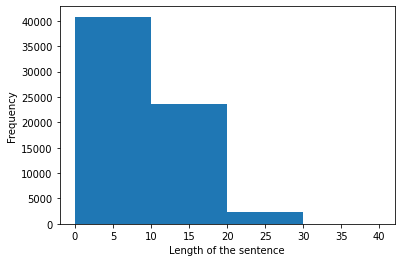

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# check the length distribution of the list with x ticks divided by 10 tokens
plt.hist(tokenized_length, bins=np.arange(0, max(tokenized_length)+1, 10))
print(max(tokenized_length)+1)
plt.xlabel("Length of the sentence")
plt.ylabel("Frequency")
plt.show()

In [37]:
# get proportion of sentences where length is between 0 and 32
min_token_length = 0
max_token_length = 42
list_between = list(filter(lambda x: x > min_token_length and x < max_token_length, tokenized_length))
print(len(list_between) , len(list_between) / len(list_loaded))

66872 0.8057935389027462


### Define tokenizer

In [39]:
model_dir = "skt/ko-gpt-trinity-1.2B-v0.5"

# https://huggingface.co/transformers/preprocessing.html
# Load the Tokenizer: "Fast" means that the tokenizer code is written in Rust Lang
tokenizer = PreTrainedTokenizerFast.from_pretrained(
    model_dir,
    max_len = max_token_length,
    padding='max_length',
    add_special_tokens = True,
    return_tensors="pt",
    truncation = True,
    bos_token = "<s>",
    eos_token = "</s>",
    unk_token = "<unk>",
    pad_token = "<pad>",
    mask_token = "<mask>",
)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


### Define model configuration and model

In [40]:
from transformers import GPT2Config

# set config and override with custom configuration
config = GPT2Config.from_pretrained(model_dir)
config

In [34]:
from transformers import GPT2LMHeadModel

# designate the model's name registered on huggingface: https://huggingface.co/skt/ko-gpt-trinity-1.2B-v0.5
model_dir = "skt/ko-gpt-trinity-1.2B-v0.5"

# Attach Language model Head to the pretrained GPT model
model = GPT2LMHeadModel.from_pretrained(model_dir) # KoGPT3 shares the same structure as KoGPT2. 

In [35]:
import torch
# move the model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(51200, 1920)
    (wpe): Embedding(1024, 1920)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
     